<a href="https://colab.research.google.com/github/SSSpock/skillspire/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section 1: Introduction to Regression

Topic Review
Regression analysis is a powerful statistical method used to study relationships between variables. It helps us understand how one or more independent variables (also known as predictors or explanatory variables) affect a dependent variable (also known as the response or outcome variable). In this lesson, we will focus on linear regression, which assumes a linear relationship between variables.

There are several types of regression, including:

Simple linear regression: one independent variable and one dependent variable.

Multiple linear regression: multiple independent variables and one dependent variable.

Polynomial regression: a nonlinear relationship between independent and dependent variables.

Regression is widely used in various fields, such as finance, economics, marketing, and more. 

Some applications include predicting stock prices, estimating the impact of marketing campaigns on sales, and analyzing the relationship between socioeconomic factors and health outcomes.

Coding Example: Importing Libraries and Loading Sample Dataset
First, let's import the necessary libraries and load a sample dataset to work with throughout this lesson.

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Load sample dataset: Advertising data (source: "An Introduction to Statistical Learning")
url = "https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/master/data/Advertising.csv"
data = pd.read_csv(url, index_col=0)

# Display the first few rows of the dataset
data.head()


,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


This dataset contains information about the advertising budget (in thousands of dollars) for TV, radio, and newspaper ads, and the corresponding sales (in thousands of units) for 200 different markets. In this lesson, we will explore the relationship between TV advertising budget and sales.

# Section 2: Simple Linear Regression: Theory

Topic Review
Simple linear regression is a method that models the linear relationship between one independent variable (X) and one dependent variable (Y). The goal is to find the line that best fits the data points, which can be represented by the following equation:

Y = β0 + β1X + ε

Y: dependent variable (response)

X: independent variable (predictor)

β0: intercept (value of Y when X = 0)

β1: slope (change in Y per unit increase in X)

ε: random error term (difference between actual and predicted values)

The best-fitting line is determined using the least squares method, which minimizes the sum of squared differences between the actual (observed) and predicted values of the dependent variable.

There are several assumptions underlying simple linear regression:

Linearity: The relationship between X and Y is linear.

Independence: The observations are independent of each other.

Homoscedasticity: The variance of the error term is constant for all values of X.

Normality: The error term follows a normal distribution.


# Coding Example: Creating a Scatter Plot to Visualize the Relationship between Two Variables

Let's create a scatter plot of TV advertising budget (X) against sales (Y) to visualize the relationship between the two variables.

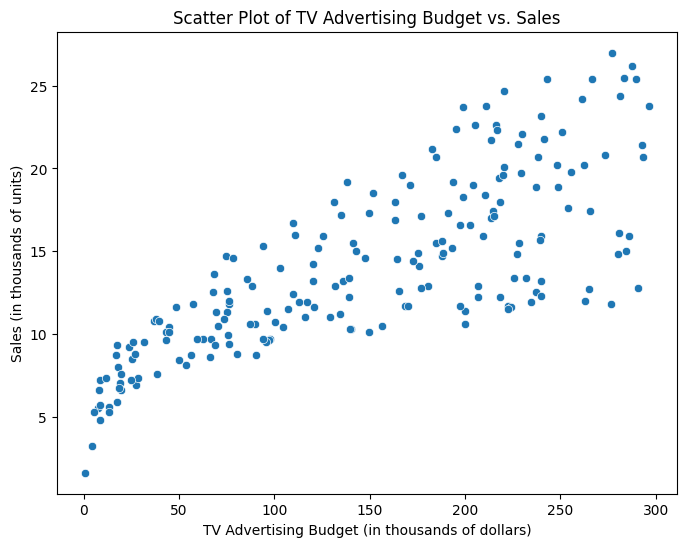

In [ ]:
# Scatter plot of TV advertising budget vs. sales
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TV', y='Sales', data=data)
plt.xlabel('TV Advertising Budget (in thousands of dollars)')
plt.ylabel('Sales (in thousands of units)')
plt.title('Scatter Plot of TV Advertising Budget vs. Sales')
plt.show()


From the scatter plot, we can observe a positive linear relationship between TV advertising budget and sales, which means that as the budget for TV ads increases, sales tend to increase as well.


# Section 3: Simple Linear Regression: Statsmodels

Topic Review
Statsmodels is a Python library that provides a comprehensive suite of statistical models for various analyses, including regression. In this section, we'll use Statsmodels to perform simple linear regression on our sample dataset.

Coding Example 1: Fitting a Simple Linear Regression Model using Statsmodels
To fit a simple linear regression model using Statsmodels, we'll follow these steps:

Prepare the data: separate the independent variable (X) and dependent variable (Y), and add a constant term to the independent variable.
Create an OLS (Ordinary Least Squares) model object.
Fit the model to the data.

In [ ]:
# Prepare the data
X = data['TV']
Y = data['Sales']
X = sm.add_constant(X)  # Add a constant term to the independent variable

# Create an OLS model object
model = sm.OLS(Y, X)

# Fit the model to the data
results = model.fit()


# Coding Example 2: Interpreting the Regression Results Summary
Now that we've fitted the model, let's take a look at the regression results summary.

In [ ]:
# Display the regression results summary
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 11 Apr 2023   Prob (F-statistic):           1.47e-42
Time:                        01:04:40   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

In the regression results summary, you'll find several important pieces of information, including:

R-squared: the proportion of the variance in the dependent variable that is predictable from the independent variable(s).

Adj. R-squared: the adjusted R-squared, which adjusts for the number of predictors in the model.
coef: the estimated coefficients for the model (β0 and β1 in our case).

std err: the standard error of the coefficient estimates.
t: the t-statistic, which tests the null hypothesis that the coefficient is equal to zero.

P>|t|: the p-value, which helps us determine if the coefficient is statistically significant (typically, a p-value below 0.05 indicates statistical significance).


# Coding Example 3: Visualizing the Regression Line on a Scatter Plot
Finally, let's visualize the fitted regression line on a scatter plot of the data.

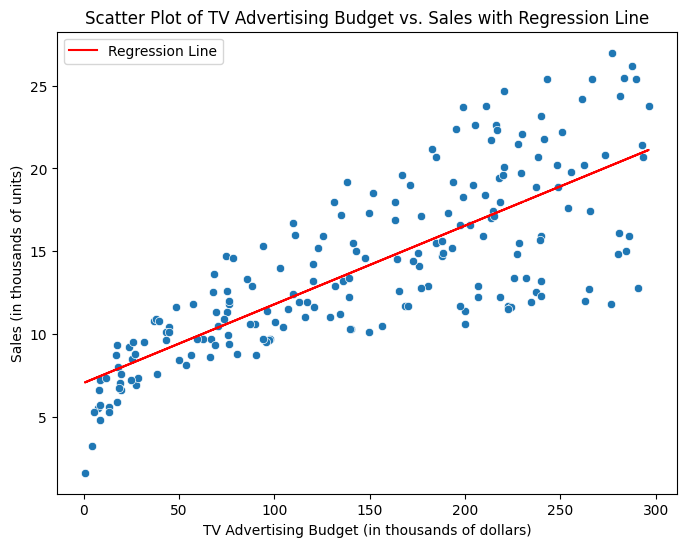

In [ ]:
# Scatter plot of TV advertising budget vs. sales
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TV', y='Sales', data=data)
plt.xlabel('TV Advertising Budget (in thousands of dollars)')
plt.ylabel('Sales (in thousands of units)')
plt.title('Scatter Plot of TV Advertising Budget vs. Sales with Regression Line')

# Plot the regression line
regression_line = results.params[0] + results.params[1] * data['TV']
plt.plot(data['TV'], regression_line, color='red', label='Regression Line')
plt.legend()

plt.show()


# Section 4: Assessing Model Performance

Topic Review
Once we've fitted a regression model, it's important to assess its performance. There are several metrics that can help us evaluate the model's performance, such as R-squared, adjusted R-squared, and other performance metrics like mean squared error (MSE) and root mean squared error (RMSE).

R-squared: The proportion of the variance in the dependent variable that is predictable from the independent variable(s). R-squared ranges from 0 to 1, with higher values indicating better model performance.

Adjusted R-squared: The adjusted R-squared adjusts for the number of predictors in the model. It is useful when comparing models with different numbers of predictors.

Mean Squared Error (MSE): The average of the squared differences between the actual and predicted values. Lower values indicate better model performance.

Root Mean Squared Error (RMSE): The square root of the mean squared error. Lower values indicate better model performance.

Coding Example: Extracting Performance Metrics from the Statsmodels Regression Results

We can extract the R-squared and adjusted R-squared values from the regression results summary. 

Additionally, we can calculate the mean squared error (MSE) and root mean squared error (RMSE) using the residuals (differences between the actual and predicted values) provided by the Statsmodels results object.

In [ ]:
# Extract R-squared and adjusted R-squared
r_squared = results.rsquared
adj_r_squared = results.rsquared_adj

# Calculate mean squared error (MSE) and root mean squared error (RMSE)
mse = np.mean(results.resid ** 2)
rmse = np.sqrt(mse)

# Display performance metrics
print(f"R-squared: {r_squared:.3f}")
print(f"Adjusted R-squared: {adj_r_squared:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")


R-squared: 0.612
Adjusted R-squared: 0.610
Mean Squared Error (MSE): 10.513
Root Mean Squared Error (RMSE): 3.242


# Topic Review: Residuals in Linear Regression Analysis
Residuals are the differences between the actual (observed) values of the dependent variable and the predicted values obtained from the regression model. They play a crucial role in linear regression analysis, as they help us evaluate the model's performance and validate the underlying assumptions.

In simple linear regression, residuals can be represented as:

Residual = Observed Value - Predicted Value
= Y - (β0 + β1X)

Residuals are used for several purposes in linear regression analysis:

Assessing model performance: The sum of squared residuals (or mean squared error) is used to determine the best-fitting line in the least squares method. Smaller residual values indicate better model performance.

Validating model assumptions: By examining residual plots, we can check the assumptions of linearity, independence, homoscedasticity, and normality. Any violation of these assumptions may indicate the need for a different model or data transformation.

Identifying outliers or influential points: Large residuals may indicate the presence of outliers or influential points that can significantly affect the regression model. Such points may need further investigation or removal from the analysis.

# Coding Example: Generating and Evaluating a Residual Plot

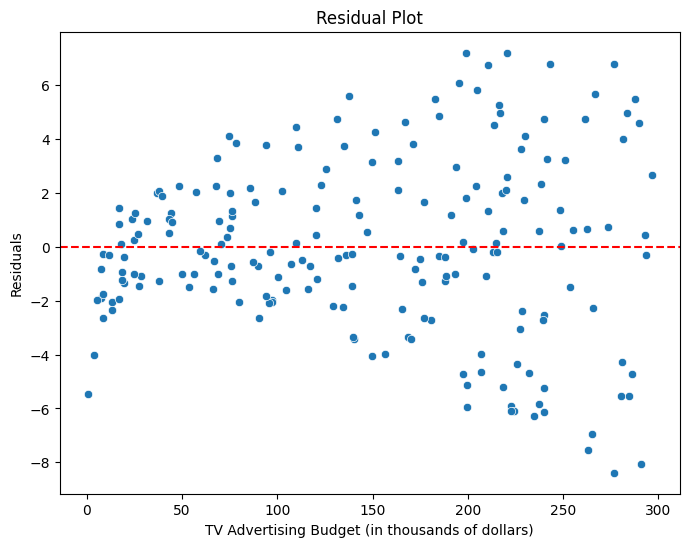

In [ ]:
# Calculate residuals
residuals = results.resid

# Create a residual plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['TV'], y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('TV Advertising Budget (in thousands of dollars)')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.show()


# Evaluating the residual plot:

Linearity: The residuals should be randomly scattered around the horizontal axis (y = 0) without any clear pattern. If there is a pattern, it may indicate that a linear model is not suitable for the data. In our case, there doesn't seem to be a clear pattern, suggesting that the linearity assumption is reasonable.

Independence: The residuals should not display any discernible trends or patterns, as this could indicate that the observations are not independent. In our plot, the residuals appear to be randomly scattered, supporting the independence assumption.

Homoscedasticity: The spread of the residuals should be approximately constant across all values of the independent variable. If the spread changes, it may indicate that the error term does not have constant variance (heteroscedasticity). In our case, the spread of the residuals appears to be relatively constant, supporting the homoscedasticity assumption.

Normality: Although it's difficult to assess normality from the residual plot alone, a histogram or Q-Q plot of the residuals can provide insights into the normality of the error term. If the residuals are not normally distributed, it may be necessary to transform the data or use a different model.



# Coding Example: Generating and Evaluating a Q-Q Plot of the Residuals

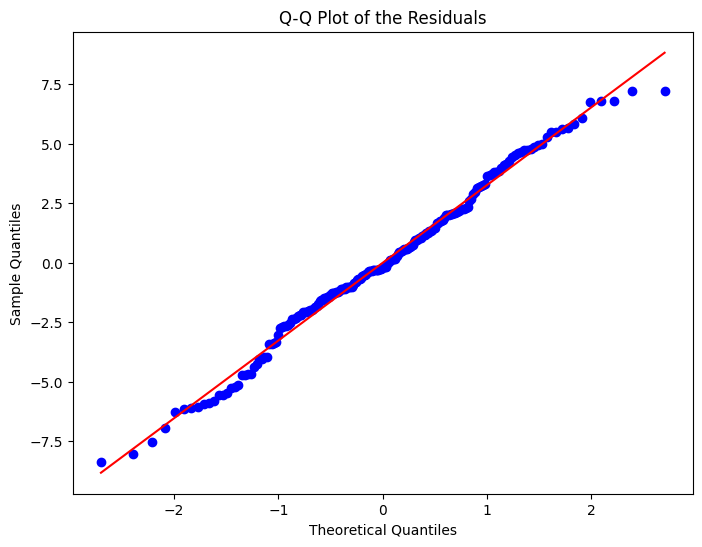

In [ ]:
import scipy.stats as stats

# Create a Q-Q plot of the residuals
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.title('Q-Q Plot of the Residuals')

plt.show()


# Evaluating the Q-Q plot:

Normality: The Q-Q plot compares the distribution of the residuals to a normal distribution. If the residuals are normally distributed, the points should roughly fall along the diagonal reference line. In our case, the points on the Q-Q plot mostly follow the reference line, suggesting that the normality assumption is reasonable.


# Section 5: Questions to Test Student Understanding

What is simple linear regression, and what is its purpose?

What is the equation for a simple linear regression model? Briefly describe each term in the equation.

List the four assumptions underlying simple linear regression, and explain why they are important.

Describe the process of fitting a simple linear regression model using Statsmodels in Python.

What are residuals in linear regression analysis, and why are they important?

How can we assess the performance of a simple linear regression model? List some common performance metrics.

What is the role of a residual plot in linear regression analysis, and what can we learn from it?

How can we use a Q-Q plot to test the normality assumption in linear regression analysis?

If the assumptions of simple linear regression are violated, what are some possible steps to address the issue?



# Multiple Linear Regression

Multiple linear regression is an extension of simple linear regression that allows us to model the relationship between a dependent variable and multiple independent variables. The purpose of multiple linear regression is to understand how the dependent variable changes as the independent variables change and to predict the value of the dependent variable based on the values of the independent variables.

The equation for a multiple linear regression model can be represented as:

Y = β0 + β1X1 + β2X2 + ... + βnXn + ε

where:

Y is the dependent variable
X1, X2, ..., Xn are the independent variables
β0 is the intercept
β1, β2, ..., βn are the coefficients of the independent variables
ε is the error term
In this course, we will use the Statsmodels library in Python to fit multiple linear regression models and evaluate their performance.



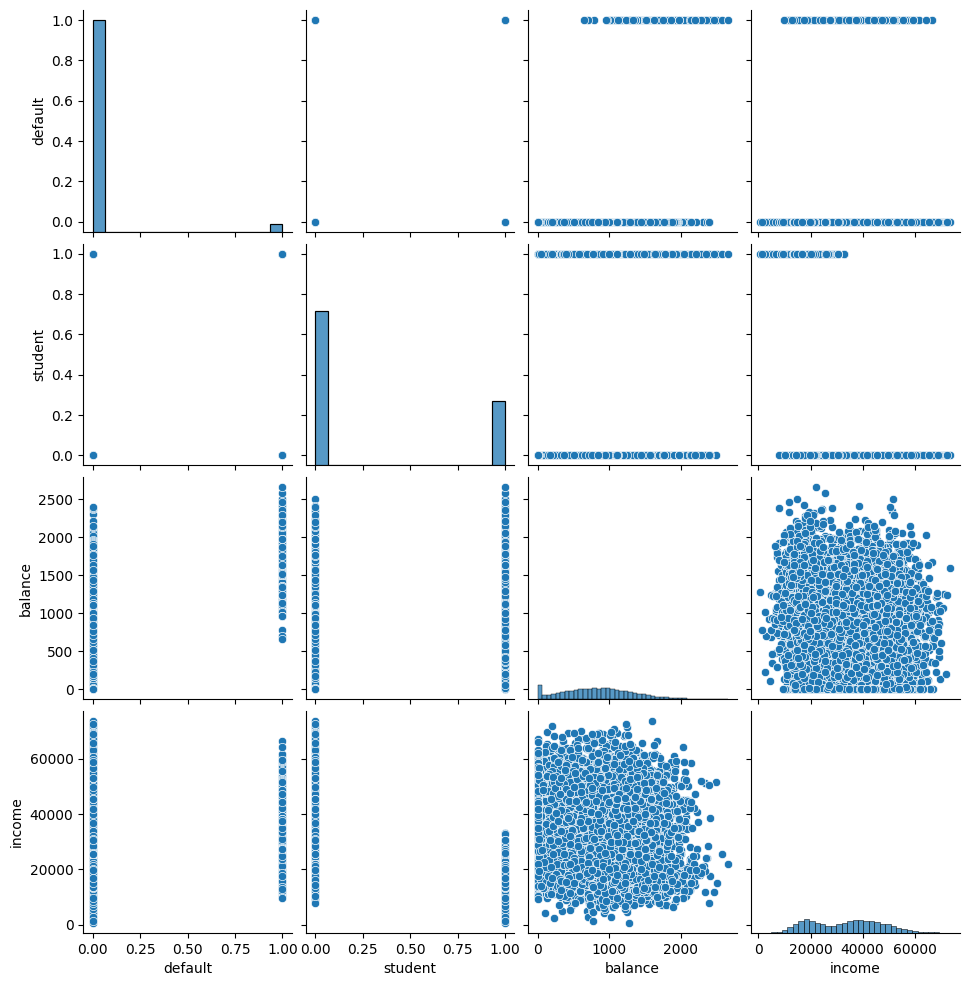

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
url = 'https://raw.githubusercontent.com/Statology/Python-Guides/main/default.csv'
data = pd.read_csv(url)

# Visualize pairwise relationships between variables
sns.pairplot(data)
plt.show()


In this coding example, we load a sample dataset and visualize the pairwise relationships between the variables using the pairplot function from the Seaborn library. The pairplot helps us understand the relationships between variables before fitting a multiple linear regression model.


# Multiple linear regression is based on several assumptions that need to be satisfied to ensure the validity of the model's results. The main assumptions of multiple linear regression are:

Linearity: The relationship between the independent variables and the dependent variable is linear.


Independence: The observations in the dataset are independent of each other.


Multivariate Normality: The residuals (errors) are normally distributed.


Homoscedasticity: The variance of the residuals is constant across different levels of the independent variables.


No multicollinearity: The independent variables are not highly correlated with each other.


It's essential to check these assumptions before interpreting the results of a multiple linear regression analysis, as violations of these assumptions can lead to biased or unreliable estimates.


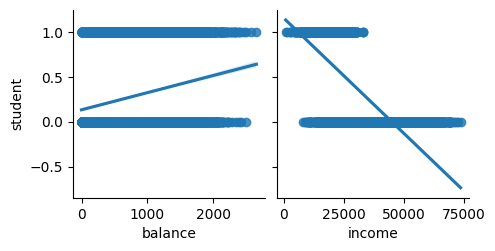

In [13]:
import seaborn as sns

# Check linearity using scatter plots
sns.pairplot(data, x_vars=['balance', 'income'], y_vars='student', kind='reg')
plt.show()


# Coding Example 2: Checking Multivariate Normality and Homoscedasticity

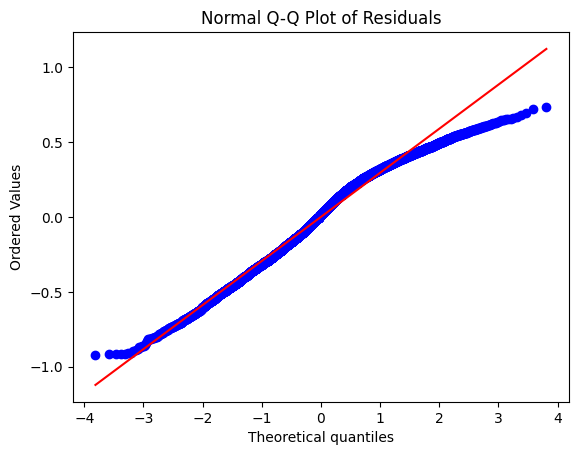

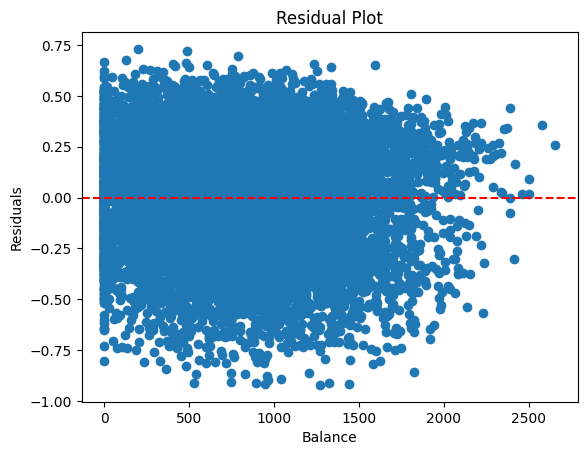

In [15]:
import scipy.stats as stats

# Calculate the residuals
residuals = model.resid

# Q-Q plot of residuals to check normality
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot of Residuals")
plt.show()

# Residual plot to check homoscedasticity
plt.scatter(data['balance'], residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Balance')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()



# Coding Example 3: Checking Multicollinearity

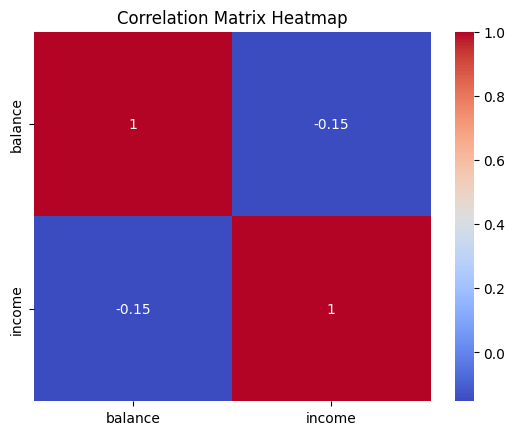

In [16]:
import pandas as pd

# Calculate the correlation matrix of the independent variables
corr_matrix = data[['balance', 'income']].corr()

# Display the correlation matrix as a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()


# Topic Review: OLS Method in Linear Regression
Ordinary Least Squares (OLS) is a method for estimating the unknown parameters in a linear regression model by minimizing the sum of the squared differences between the observed dependent variable and the predicted dependent variable. OLS provides the best linear unbiased estimators for the coefficients in the regression model, assuming that the model assumptions hold.

In matrix notation, a multiple linear regression model can be represented as:

Y = Xβ + ε

where:

Y is a column vector of the dependent variable
X is a matrix of the independent variables, including a column of ones for the intercept
β is a column vector of the regression coefficients
ε is a column vector of the error terms
The OLS estimation for the regression coefficients can be calculated as:

β = (X'X)^(-1)X'Y

where X' is the transpose of the matrix X.

In [3]:
data

,default,student,balance,income
0,0,0,729.526495,44361.625074
1,0,1,817.180407,12106.134700
2,0,0,1073.549164,31767.138947
3,0,0,529.250605,35704.493935
4,0,0,785.655883,38463.495879
...,...,...,...,...
9995,0,0,711.555020,52992.378914
9996,0,0,757.962918,19660.721768
9997,0,0,845.411989,58636.156984
9998,0,0,1569.009053,36669.112365


# Coding Example: Matrix Representation and OLS Estimation

In [6]:
# Load a new dataset for multiple linear regression
url = 'https://raw.githubusercontent.com/Statology/Python-Guides/main/default.csv'
data = pd.read_csv(url)

# Select a subset of the data for the regression analysis
data = data[['student', 'balance', 'income']]

# Prepare the data matrices
X = data[['balance', 'income']].values
X = np.column_stack((np.ones(len(X)), X))
Y = data['student'].values.reshape(-1, 1)

# Calculate the OLS estimates for the coefficients
XTX_inv = np.linalg.inv(X.T @ X)
XTY = X.T @ Y
beta = XTX_inv @ XTY

print("Coefficients (OLS):", beta.flatten())


Coefficients (OLS): [ 1.07067659e+00  8.56488256e-05 -2.52954002e-05]


In this coding example, we manually calculate the OLS estimates for the coefficients of a multiple linear regression model. We first prepare the data matrices X and Y, then calculate the OLS estimates using the matrix formula.

# Section 3: Multiple Linear Regression Using Statsmodels


Statsmodels is a powerful Python library for statistical modeling, which provides various tools for estimation, testing, and exploration of data. 

In this section, we will use the Statsmodels library to fit a multiple linear regression model, interpret the regression results summary, and use the model for predictions.

# Coding Example 1: Fitting a Multiple Linear Regression Model

In [8]:
import statsmodels.api as sm

# Prepare the data
X = data[['balance', 'income']]
X = sm.add_constant(X)
Y = data['student']

# Fit the multiple linear regression model
model = sm.OLS(Y, X).fit()

# Display the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                student   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     6806.
Date:                Wed, 12 Apr 2023   Prob (F-statistic):               0.00
Time:                        23:52:35   Log-Likelihood:                -2035.0
No. Observations:               10000   AIC:                             4076.
Df Residuals:                    9997   BIC:                             4098.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0707      0.010    104.754      0.0

In this coding example, we use the Statsmodels library to fit a multiple linear regression model with 'balance' and 'income' as independent variables and 'student' as the dependent variable. We add a constant to the independent variables using the add_constant function, and then fit the model using the OLS class.

The summary method provides a comprehensive summary of the regression results, including the estimated coefficients, standard errors, t-values, p-values, and other relevant statistics.



Coding Example 2: Interpreting the Regression Results Summary

In [ ]:
# Extract the estimated coefficients
coefficients = model.params
print("Coefficients:", coefficients)

# Extract the p-values
p_values = model.pvalues
print("P-values:", p_values)

# Extract the R-squared and Adjusted R-squared
r_squared = model.rsquared
adjusted_r_squared = model.rsquared_adj
print("R-squared:", r_squared)
print("Adjusted R-squared:", adjusted_r_squared)


In this coding example, we demonstrate how to extract various statistics from the model summary, such as the estimated coefficients, p-values, R-squared, and Adjusted R-squared. These statistics can help us assess the significance of the independent variables and the overall fit of the model.

# Section 4: Model Selection Techniques in Statistical Modeling

Topic Review: Model Selection Techniques
Model selection involves choosing the best model from a set of candidate models based on their performance metrics or some other criteria. In statistical modeling, model selection techniques aim to balance the trade-off between model complexity and model performance.

Some common model selection techniques used in multiple linear regression are:

Stepwise Regression: Stepwise regression involves iteratively adding or removing independent variables from the model based on their statistical significance. There are three types of stepwise regression: forward selection, backward elimination, and bidirectional elimination.

Information Criteria: Information criteria, such as Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC), balance the goodness-of-fit of a model with its complexity. Lower values of AIC or BIC indicate better models.

F-statistic: The F-statistic measures the overall significance of a regression model. Higher F-statistic values indicate a better fit.



# Topic Review: Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC)

The Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC) are two popular model selection criteria that help in choosing the best model from a set of candidate models. Both AIC and BIC balance the goodness-of-fit of a model with its complexity, which helps prevent overfitting.

Akaike Information Criterion (AIC): AIC is a measure of the relative quality of a model for a given dataset. It is based on the likelihood function and takes into account the number of parameters in the model. Lower AIC values indicate better models. The AIC is defined as:

AIC = 2k - 2ln(L)

where k is the number of parameters in the model (including the intercept) and L is the maximized value of the likelihood function for the model.

Bayesian Information Criterion (BIC): BIC is another measure of the relative quality of a model, similar to AIC. However, BIC penalizes models with more parameters more heavily compared to AIC, making it more suitable for model selection when there is a larger number of independent variables. Lower BIC values indicate better models. The BIC is defined as:

BIC = k * ln(n) - 2ln(L)

where k is the number of parameters in the model, n is the number of observations, and L is the maximized value of the likelihood function for the model.

Both AIC and BIC can be used to compare and select models in multiple linear regression, as well as other statistical modeling techniques. When choosing between AIC and BIC, it is essential to consider the specific context and goals of the analysis, as well as the number of independent variables and the size of the dataset.

# Coding Example 1: Comparing Models Using AIC, BIC, and F-statistic


In [10]:
import itertools

# Function to fit a multiple linear regression model and return AIC, BIC, and F-statistic
def fit_model(variables, data):
    X = data[list(variables)]
    X = sm.add_constant(X)
    Y = data['student']
    model = sm.OLS(Y, X).fit()
    return model.aic, model.bic, model.fvalue

# Get all possible combinations of independent variables
independent_variables = ['balance', 'income']
variable_combinations = []
for i in range(1, len(independent_variables) + 1):
    combinations = list(itertools.combinations(independent_variables, i))
    variable_combinations.extend(combinations)

# Compare models using AIC, BIC, and F-statistic
best_aic = best_bic = float('inf')
best_f_stat = 0
best_model_aic = best_model_bic = best_model_f_stat = None

for variables in variable_combinations:
    aic, bic, f_stat = fit_model(variables, data)
    
    if aic < best_aic:
        best_aic = aic
        best_model_aic = variables
        
    if bic < best_bic:
        best_bic = bic
        best_model_bic = variables

    if f_stat > best_f_stat:
        best_f_stat = f_stat
        best_model_f_stat = variables

print("Best model by AIC:", best_model_aic)
print("Best model by BIC:", best_model_bic)
print("Best model by F-statistic:", best_model_f_stat)


Best model by AIC: ('balance', 'income')
Best model by BIC: ('balance', 'income')
Best model by F-statistic: ('income',)


In this coding example, we create a function to fit a multiple linear regression model and return the AIC, BIC, and F-statistic for that model. Then, we generate all possible combinations of the independent variables 'balance' and 'income', fit a model for each combination, and compare the models based on AIC, BIC, and F-statistic.

# Topic Review: Model Evaluation Techniques
Model evaluation is the process of assessing the performance of a statistical model on a given dataset. In multiple linear regression, some common model evaluation techniques include:

R-squared: R-squared (R²) is a measure of the proportion of the variance in the dependent variable that can be explained by the independent variables. Higher R-squared values indicate a better fit.

Adjusted R-squared: Adjusted R-squared adjusts the R-squared value for the number of independent variables in the model. It is especially useful for comparing models with different numbers of independent variables.

Residual Analysis: Residuals are the differences between the observed values of the dependent variable and the predicted values from the model. Residual analysis involves checking the assumptions of linear regression, such as linearity, normality, and homoscedasticity, using residual plots and other diagnostic tools.

Mean Squared Error (MSE): MSE is the average of the squared differences between the observed values of the dependent variable and the predicted values from the model. Lower MSE values indicate better model performance.



# Coding Example 1: Calculating R-squared and Adjusted R-squared

In [11]:
# Calculate the R-squared and Adjusted R-squared for the model
r_squared = model.rsquared
adjusted_r_squared = model.rsquared_adj

print("R-squared:", r_squared)
print("Adjusted R-squared:", adjusted_r_squared)


R-squared: 0.5765643336836626
Adjusted R-squared: 0.5764796211366352


# Coding Example 2: Residual Analysis

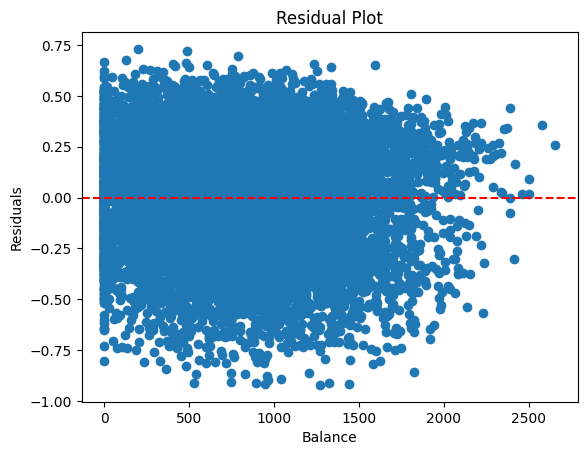

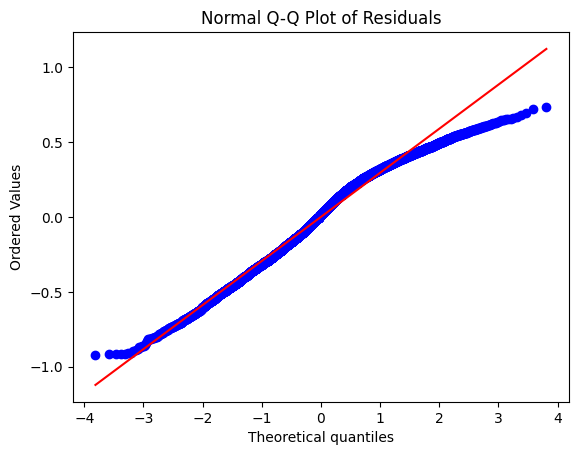

In [12]:
import scipy.stats as stats

# Calculate the residuals
residuals = model.resid

# Plot the residuals
plt.scatter(data['balance'], residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Balance')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Q-Q plot of residuals
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot of Residuals")
plt.show()


In this coding example, we perform residual analysis by plotting the residuals against the independent variable 'balance' and by creating a Q-Q plot to check the normality assumption of the residuals.